# Minu esimese taseme pealkiri

## Teise taseme pealkiri

Tavaline tekst

Link http://markdownguide.org

    year  population  women_population  men_population
49  1975     1429352            770791          658561
48  1976     1439576            775510          664066
47  1977     1450211            780501          669710
46  1978     1460188            785198          674990
45  1979     1468333            788965          679368


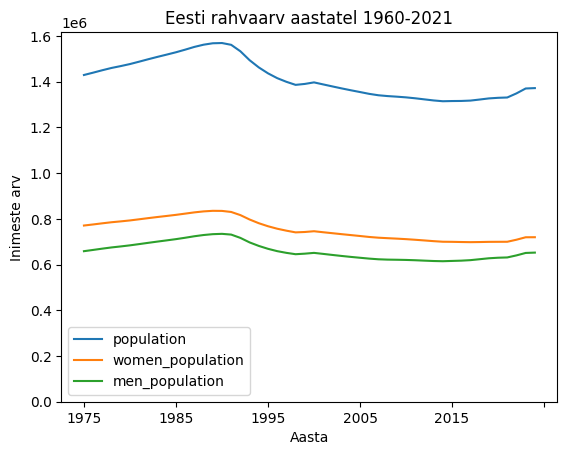

In [ ]:
# paigalda pip install tools.api_request

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# url = "https://demo-datahub.rik.ee/api/v1/meta/classifications"

url_riik = 'https://api.worldbank.org/v2/countries/EST/?format=json'
url_rahvastik_ = 'https://api.worldbank.org/v2/country/EST/indicator/SP.POP.TOTL?format=json'
url_women = "https://api.worldbank.org/v2/country/EST/indicator/SP.POP.TOTL.FE.IN?format=json"

response = requests.get(url_rahvastik_)
data = response.json()

response_woman = requests.get(url_women)
data_woman = response_woman.json()


# json dumps muudab väljundi terminalis loetavaks
# print(json.dumps(data, indent=2, ensure_ascii=False))

values = {'year': [], 'population': [], 'women_population': []}

# {"year": ["2021", "2020", "2019", ...], "population": [1331057, 1326535, 1324820, ...]}

for item in data[1]:
    values['year'].append(item['date'])
    values['population'].append(item['value'])

for women in data_woman[1]:
    values['women_population'].append(women['value'])

# print(json.dumps(values, indent=2, ensure_ascii=False))

df = pd.DataFrame(values)

df = df.sort_values(by='year')  # sorteerin aasta järgi kasvavalt

df['men_population'] = df['population'] - df['women_population']

# väljastan esimesed read
print(df.head())

# joonistamise osa
df.plot(x='year', y=['population', 'women_population', 'men_population'], kind='line',
        title='Eesti rahvaarv aastatel 1960-2021', xlabel='Aasta', ylabel='Inimeste arv')
plt.ylim(bottom=0)  # y telje algus

plt.show()


# print(df)

# response_df = pd.json_normalize(data)
# print(response_df)


   SaleID        Date CustomerID ProductID  Quantity  UnitPrice  Discount  \
0  S00001  2023-01-31       C004      P004         5      56.81      0.10   
1  S00002  30.12.2023       C001      P005         7      98.78      0.15   
2  S00003  2022-05-10       C001      P006         3      97.12      0.15   
3  S00004  2023-07-18       C003      P002         9      47.33      0.05   
4  S00005  2023-02-04       C004      P001         4      71.67      0.15   

  SalesRepID RegionID  
0       SR02      R03  
1       SR01      R01  
2       SR01      R01  
3       SR01      R01  
4       SR02      R03  
  CustomerID CustomerName    Industry Country RegionID
0       C001    Alice Ltd      Retail     USA      R01
1       C002      Bob Inc   Wholesale  Canada      R02
2       C003  Charlie LLC  E-commerce     USA      R01
3       C004  Delta Group      Retail      UK      R03
   SaleID        Date CustomerID ProductID  Quantity  UnitPrice  Discount  \
0  S00001  2023-01-31       C004      P00

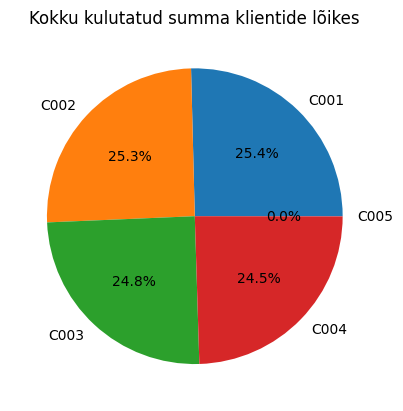

           Quantity  UnitPrice  Discount       Amount
ProductID                                            
P001          14812  161054.34    217.70  760324.7670
P002          14987  167091.27    225.05  777404.5705
P003          14458  159457.22    218.80  727034.6775
P004          14730  161949.01    222.85  755711.7210
P005            307     148.04      0.20   14626.8410


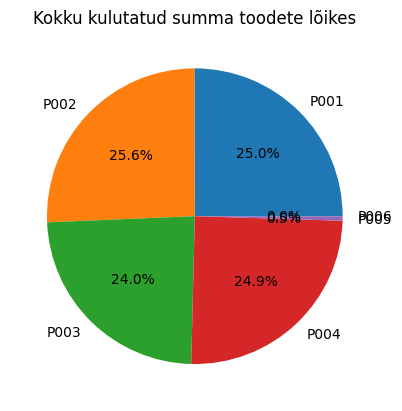

         Quantity  UnitPrice  Discount       Amount
Country                                            
Canada      14806  163011.82    220.35   766877.643
UK          14690  162476.06    222.50   743518.923
USA         29793  324206.22    441.75  1524546.017


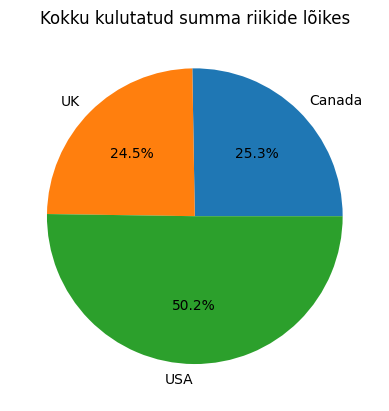

             CostPrice  Quantity  UnitPrice  Discount       Amount
ProductName                                                       
Device D       58680.0     14730  161949.01    222.85  753029.1775
Gadget C       87930.0     14458  159457.22    218.80  748123.9145
Widget A       29250.0     14812  161054.34    217.70  771882.6080
Widget B       23808.0     14987  167091.27    225.05  761637.0170


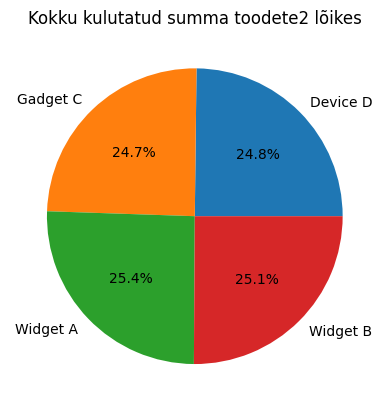

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

source_url= r'C:\Users\opilane\Documents\andmetarkus\Python\analysis\input\SalesTable.csv'
customer_data_url= r'C:\Users\opilane\Documents\andmetarkus\Python\analysis\input\CustomerTable.csv'
product_data_url= r'C:\Users\opilane\Documents\andmetarkus\Python\analysis\input\ProductTable.xlsx'

sales_data = pd.read_csv(source_url) 
customer_data_url = pd.read_csv(customer_data_url)
product_data = pd.read_excel(product_data_url)
print(sales_data.head())
print(customer_data_url.head())
print
merged_data = pd.merge(sales_data, customer_data_url, on='CustomerID', how='left')
print(merged_data.head())
merged_data_product = pd.merge(product_data, merged_data, on='ProductID', how='left')
print(merged_data_product.head())
sales_data['Amount'] = sales_data['Quantity'] * sales_data['UnitPrice'] * (1-sales_data['Discount'])
merged_data['Amount'] = sales_data['Quantity'] * sales_data['UnitPrice'] * (1-sales_data['Discount'])
merged_data_product['Amount'] = sales_data['Quantity'] * sales_data['UnitPrice'] * (1-sales_data['Discount'])

grouped =sales_data.groupby('CustomerID').sum(numeric_only=True)
print(grouped.head())

grouped.plot(y='Amount', kind='pie', title='Kokku kulutatud summa klientide lõikes', ylabel='', legend=False, autopct='%1.1f%%') 
plt.show()

grouped =sales_data.groupby('ProductID').sum(numeric_only=True)
print(grouped.head())

grouped.plot(y='Amount', kind='pie', title='Kokku kulutatud summa toodete lõikes', ylabel='', legend=False, autopct='%1.1f%%')

plt.show()

grouped =merged_data.groupby('Country').sum(numeric_only=True)
print(grouped.head())

grouped.plot(y='Amount', kind='pie', title='Kokku kulutatud summa riikide lõikes', ylabel='', legend=False, autopct='%1.1f%%')

plt.show()

grouped =merged_data_product.groupby('ProductName').sum(numeric_only=True)
print(grouped.head())

grouped.plot(y='Amount', kind='pie', title='Kokku kulutatud summa toodete2 lõikes', ylabel='', legend=False, autopct='%1.1f%%')

plt.show()
